# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# ============================================
# IMPORT LIBRARY
# ============================================

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

import joblib

print("📌 Library berhasil diimport.")

📌 Library berhasil diimport.


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# ==============================
# Memuat Dataset
# ==============================
NAMA_SISWA = "Zanubba"
NAMA_DATASET = "heart_disease"

RAW_DIR = f"/content/drive/MyDrive/Eksperimen_SML_{NAMA_SISWA}/{NAMA_DATASET}_raw"
PREP_DIR = f"/content/drive/MyDrive/Eksperimen_SML_{NAMA_SISWA}/preprocessing/{NAMA_DATASET}_preprocessing"

os.makedirs(RAW_DIR, exist_ok=True)
os.makedirs(PREP_DIR, exist_ok=True)

# ==============================
# Download dataset dari Kaggle
# ==============================
!pip install -q kagglehub
import kagglehub

# Dataset Kaggle: Heart Disease
dataset_path = kagglehub.dataset_download(
    "johnsmith88/heart-disease-dataset"
)

print("Dataset downloaded to:", dataset_path)

# ==============================
# Load dataset
# ==============================
raw_csv_path = os.path.join(RAW_DIR, f"{NAMA_DATASET}.csv")

# Salin CSV ke folder RAW_DIR
for file in os.listdir(dataset_path):
    if file.endswith(".csv"):
        source = os.path.join(dataset_path, file)
        os.system(f"cp '{source}' '{raw_csv_path}'")

df = pd.read_csv(raw_csv_path)

print("Dataset berhasil dimuat")
print("Lokasi:", raw_csv_path)

# ==============================
# Cek data
# ==============================
df.head()

Using Colab cache for faster access to the 'heart-disease-dataset' dataset.
Dataset downloaded to: /kaggle/input/heart-disease-dataset
Dataset berhasil dimuat
Lokasi: /content/drive/MyDrive/Eksperimen_SML_Zanubba/heart_disease_raw/heart_disease.csv


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

📌 Jumlah baris dan kolom: (1025, 14)

📌 Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

📌 Statistik Deskriptif:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


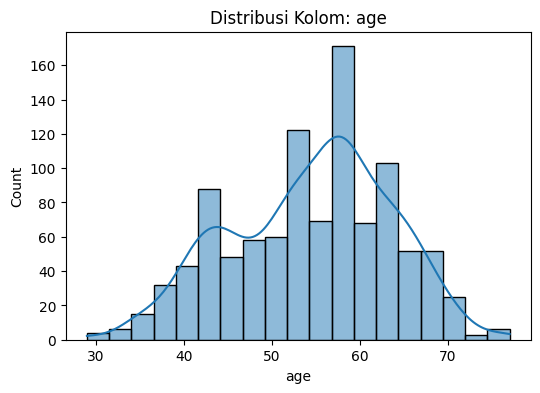

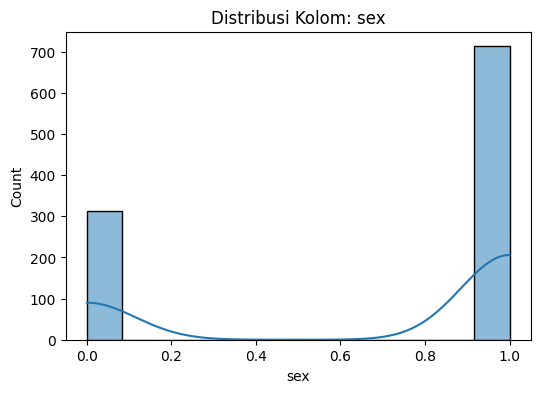

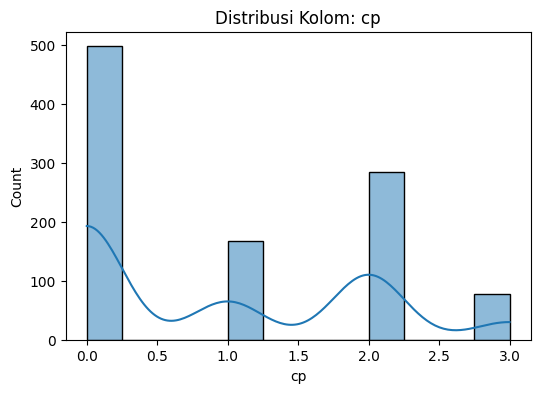

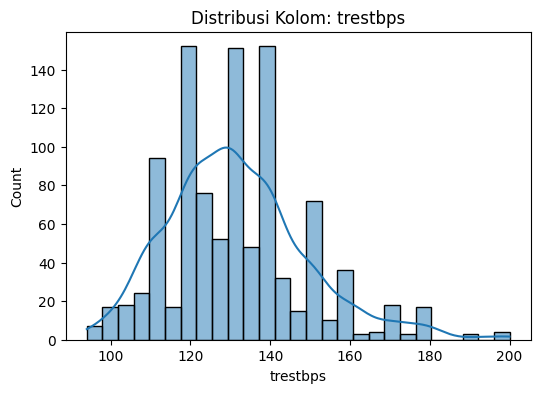

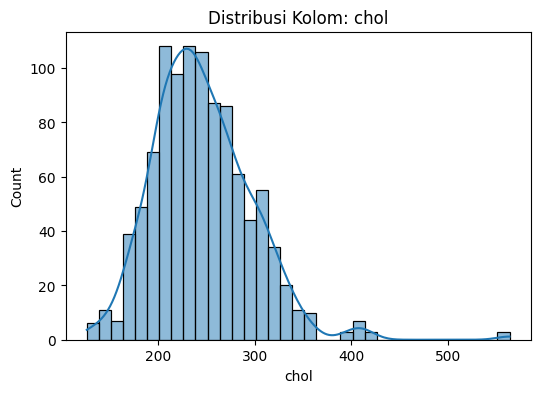

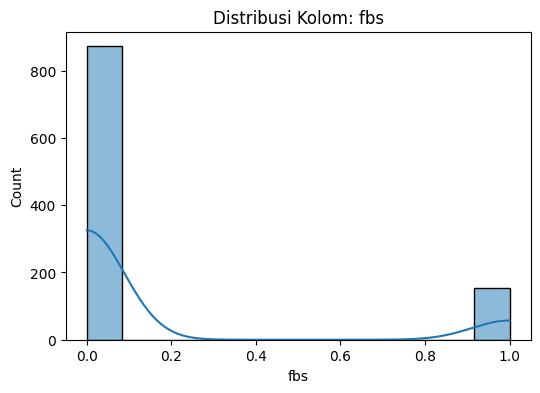

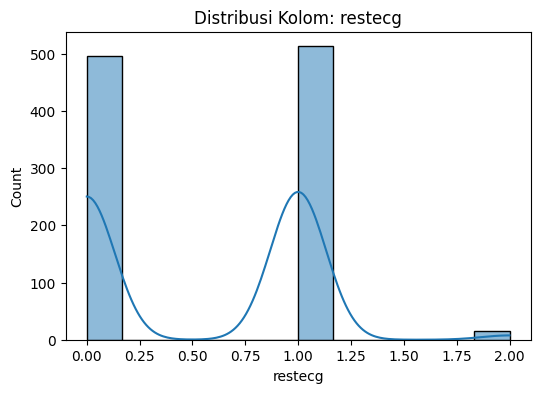

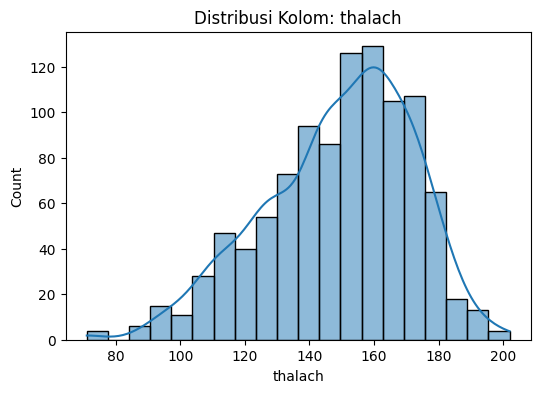

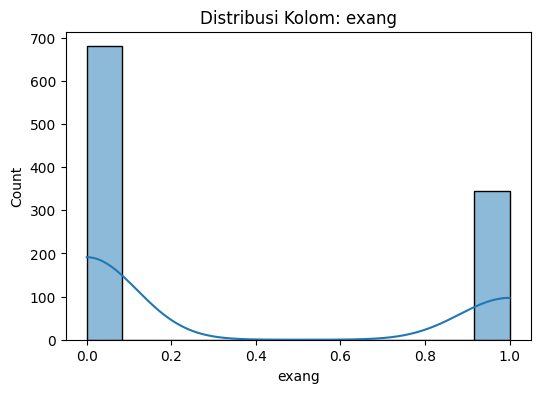

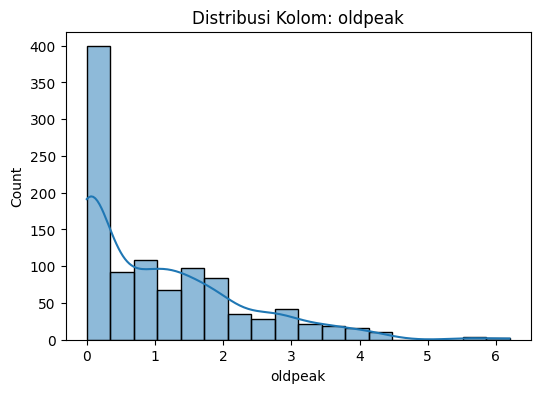

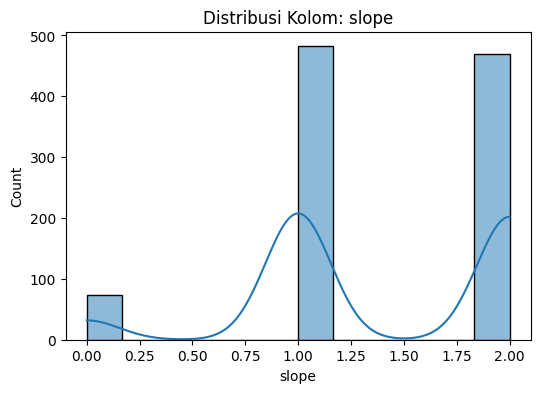

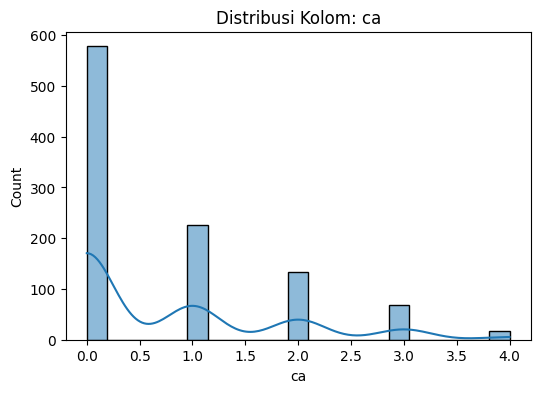

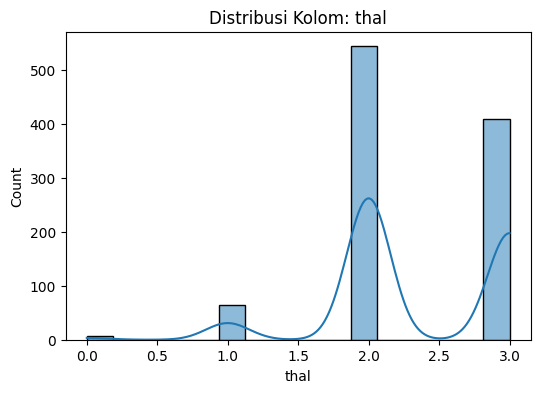

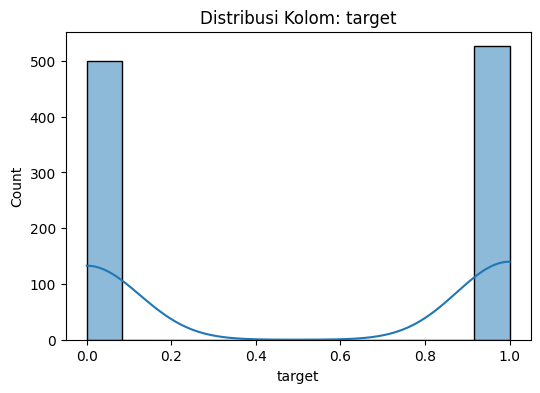

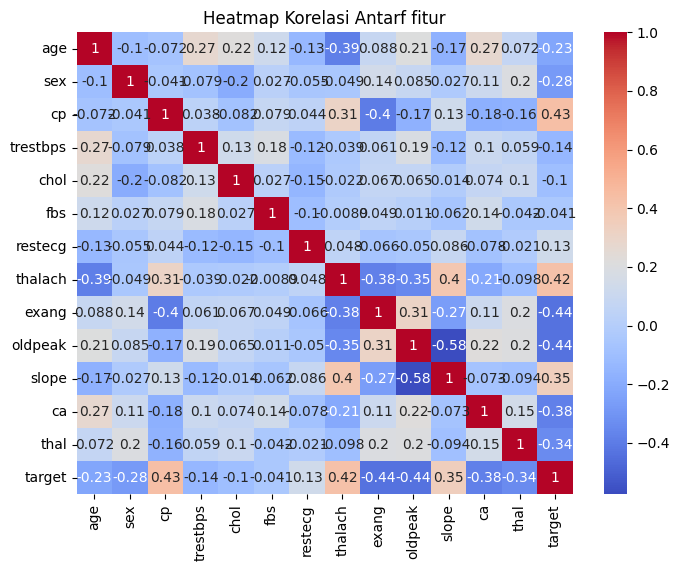

📌 Proses EDA selesai.


In [3]:
# ============================================
# EXPLORATORY DATA ANALYSIS (EDA)
# ============================================

print("📌 Jumlah baris dan kolom:", df.shape)

# Mengecek missing values
print("\n📌 Missing Values:")
print(df.isnull().sum())

# Statistik deskriptif
print("\n📌 Statistik Deskriptif:")
display(df.describe(include='all'))

# Distribusi numerik
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribusi Kolom: {col}")
    plt.show()

# Korelasi
if len(numeric_cols) >= 2:
    plt.figure(figsize=(8,6))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
    plt.title("Heatmap Korelasi Antarf fitur")
    plt.show()

print("📌 Proses EDA selesai.")

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [4]:
print("=" * 50)
print("DATA PREPROCESSING UNTUK RANDOM FOREST CLASSIFIER")
print("=" * 50)

# Simpan data asli
df_original = df.copy()

# 0. MENENTUKAN TARGET VARIABEL
print("\n0. MENENTUKAN TARGET VARIABEL")
print("-" * 30)

target_column = "target"

if target_column not in df.columns:
    raise ValueError("Kolom target tidak ditemukan dalam dataset")

print(f"Target variabel yang digunakan: '{target_column}'")
print("Distribusi target:")
print(df[target_column].value_counts())

# --------------------------------------------------
# 1. HANDLING MISSING VALUES
print("\n1. PENANGANAN MISSING VALUES")
print("-" * 30)

missing_before = df.isnull().sum()

if missing_before.sum() > 0:
    print(f"Total missing values: {missing_before.sum()}")
    print(missing_before[missing_before > 0])

    # Pisahkan fitur numerik & kategorikal
    numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop(target_column, errors="ignore")
    categorical_cols = df.select_dtypes(include=["object"]).columns

    # Imputasi
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
    df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

    print("Missing values berhasil ditangani (median & mode)")
else:
    print("Tidak ada missing values")

# --------------------------------------------------
# 2. HANDLING DUPLICATES
print("\n2. PENANGANAN DATA DUPLIKAT")
print("-" * 30)

duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"Menghapus {duplicates} data duplikat")
    df = df.drop_duplicates()
else:
    print("Tidak ada data duplikat")

# --------------------------------------------------
# 3. ANALISIS OUTLIER (INFORMASI SAJA)
print("\n3. ANALISIS OUTLIER (Hanya Informasi)")
print("-" * 30)

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop(target_column, errors="ignore")
outlier_info = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_info[col] = {
        "count": len(outliers),
        "percentage": len(outliers) / len(df) * 100
    }

print("Outlier per fitur (IQR 1.5):")
for col, info in outlier_info.items():
    print(f"  {col:10}: {info['count']:3} ({info['percentage']:.1f}%)")

print("\nCatatan: Random Forest cukup robust terhadap outlier")

# --------------------------------------------------
# 4. ENCODING DATA KATEGORIKAL
print("\n4. ENCODING DATA KATEGORIKAL")
print("-" * 30)

categorical_cols = df.select_dtypes(include=["object"]).columns

if len(categorical_cols) > 0:
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    print("One-Hot Encoding diterapkan pada kolom kategorikal")
else:
    print("Tidak ada fitur kategorikal")

# --------------------------------------------------
# 5. PREPARASI FEATURE DAN TARGET
print("\n5. PREPARASI FEATURE DAN TARGET")
print("-" * 30)

X = df.drop(columns=[target_column])
y = df[target_column]

print(f"Jumlah fitur: {X.shape[1]}")
print(f"Jumlah sampel: {X.shape[0]}")
print(f"Jumlah kelas target: {y.nunique()}")

# --------------------------------------------------
# 6. TRAIN-TEST SPLIT (STRATIFIED)
print("\n6. TRAIN-TEST SPLIT (STRATIFIED)")
print("-" * 30)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Train set: {X_train.shape[0]} sampel")
print(f"Test set : {X_test.shape[0]} sampel")

print("\nDistribusi target (Train):")
print(y_train.value_counts())
print("\nDistribusi target (Test):")
print(y_test.value_counts())

# --------------------------------------------------
# 7. SCALING (OPSIONAL)
print("\n7. SCALING (OPSIONAL)")
print("-" * 30)

print("Random Forest tidak memerlukan scaling karena berbasis decision tree")

# --------------------------------------------------
# 8. RINGKASAN AKHIR
print("\n" + "=" * 50)
print("RINGKASAN AKHIR PREPROCESSING")
print("=" * 50)

print(f"Jumlah baris akhir  : {df.shape[0]}")
print(f"Jumlah kolom akhir  : {df.shape[1]}")
print(f"Target variabel     : {target_column}")
print(f"Missing values      : {df.isnull().sum().sum()}")
print(f"Data duplikat       : {df.duplicated().sum()}")

print("\nData siap digunakan untuk Random Forest Classifier")
print("=" * 50)

# --------------------------------------------------
# SIMPAN DATASET HASIL PREPROCESSING
from google.colab import files

output_file = "heart_disease_preprocessing.csv"
df.to_csv(output_file, index=False)
files.download(output_file)

print(f"Dataset hasil preprocessing disimpan sebagai: {output_file}")

DATA PREPROCESSING UNTUK RANDOM FOREST CLASSIFIER

0. MENENTUKAN TARGET VARIABEL
------------------------------
Target variabel yang digunakan: 'target'
Distribusi target:
target
1    526
0    499
Name: count, dtype: int64

1. PENANGANAN MISSING VALUES
------------------------------
Tidak ada missing values

2. PENANGANAN DATA DUPLIKAT
------------------------------
Menghapus 723 data duplikat

3. ANALISIS OUTLIER (Hanya Informasi)
------------------------------
Outlier per fitur (IQR 1.5):
  age       :   0 (0.0%)
  sex       :   0 (0.0%)
  cp        :   0 (0.0%)
  trestbps  :   9 (3.0%)
  chol      :   5 (1.7%)
  fbs       :  45 (14.9%)
  restecg   :   0 (0.0%)
  thalach   :   1 (0.3%)
  exang     :   0 (0.0%)
  oldpeak   :   5 (1.7%)
  slope     :   0 (0.0%)
  ca        :  24 (7.9%)
  thal      :   2 (0.7%)

Catatan: Random Forest cukup robust terhadap outlier

4. ENCODING DATA KATEGORIKAL
------------------------------
Tidak ada fitur kategorikal

5. PREPARASI FEATURE DAN TARGET
--

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Dataset hasil preprocessing disimpan sebagai: heart_disease_preprocessing.csv


Automate_Zanubba

In [5]:
%%writefile automate_Zanubba.py

def load_dataset(path):
    return pd.read_csv(path)

def clean_data(df):
    df = df.dropna()
    df = df.drop_duplicates()
    return df

def encode_categorical(df):
    categorical_cols = df.select_dtypes(include="object").columns
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    return df

def scale_numeric(df, target_column):
    numeric_cols = df.drop(columns=[target_column]).select_dtypes(
        include=["int64", "float64"]
    ).columns

    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    return df, scaler

def split_data(df, target_column, test_size=0.2):
    X = df.drop(columns=[target_column])
    y = df[target_column]

    return train_test_split(
        X, y,
        test_size=test_size,
        random_state=42,
        stratify=y
    )

def preprocess_pipeline(path, target_column):
    df = load_dataset(path)
    df = clean_data(df)
    df = encode_categorical(df)
    df, scaler = scale_numeric(df, target_column)

    X_train, X_test, y_train, y_test = split_data(df, target_column)

    return df, X_train, X_test, y_train, y_test, scaler
from automate_Zanubba import preprocess_pipeline

PATH = "/content/drive/MyDrive/Eksperimen_SML_Zanubba/preprocessing/heart_disease_preprocessing/heart_disease_preprocessing.csv"
TARGET = "target"

df_clean, X_train, X_test, y_train, y_test, scaler = preprocess_pipeline(
    PATH,
    TARGET
)

print("🚀 Preprocessing selesai!")
print("Shape data bersih:", df_clean.shape)
print("Train:", X_train.shape)
print("Test :", X_test.shape)

Writing automate_Zanubba.py


Modelling

In [6]:
# ==============================
# Konfigurasi project
# ==============================
root = "Membangun_model"
dataset_folder = os.path.join(root, "heart_disease_preprocessing")

# ==============================
# 1. Membuat folder utama
# ==============================
os.makedirs(root, exist_ok=True)
os.makedirs(dataset_folder, exist_ok=True)

# ==============================
# 2. modelling.py
# ==============================
modelling_py = """
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Load dataset hasil preprocessing
df = pd.read_csv("heart_disease_preprocessing/heart_disease_preprocessing.csv")

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

with mlflow.start_run(run_name="rf_autolog_basic"):
    mlflow.sklearn.autolog()

    model = RandomForestClassifier(
        n_estimators=100,
        random_state=42
    )
    model.fit(X_train, y_train)

print("Training selesai: modelling.py")
"""

# ==============================
# 3. modelling_tuning.py
# ==============================
modelling_tuning_py = r"""
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Load dataset hasil preprocessing
df = pd.read_csv("heart_disease_preprocessing/heart_disease_preprocessing.csv")

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    scoring='accuracy'
)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_

# Manual logging
with mlflow.start_run(run_name="rf_tuning_advanced"):
    mlflow.log_param("n_estimators", best_model.n_estimators)
    mlflow.log_param("max_depth", best_model.max_depth)

    y_pred = best_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("f1_score", f1)

    # Artefak tambahan
    with open("feature_info.txt", "w") as f:
        f.write(str(X.columns.tolist()))

    mlflow.log_artifact("feature_info.txt")
    mlflow.sklearn.log_model(best_model, "best_model")

print("Training selesai: modelling_tuning.py")
"""

# ==============================
# 4. requirements.txt
# ==============================
requirements = """
mlflow
scikit-learn
pandas
numpy
dagshub
"""

# ==============================
# 5. DagsHub.txt
# ==============================
dagshub_txt = "https://dagshub.com/USERNAME/heart-disease-mlflow"

# ==============================
# 6. Simpan semua file
# ==============================
files_to_write = {
    "modelling.py": modelling_py,
    "modelling_tuning.py": modelling_tuning_py,
    "requirements.txt": requirements,
    "DagsHub.txt": dagshub_txt,
}

for filename, content in files_to_write.items():
    with open(os.path.join(root, filename), "w") as f:
        f.write(content)

# ==============================
# 7. Dummy placeholder images
# ==============================
open(os.path.join(root, "screenshoot_dashboard.jpg"), "wb").close()
open(os.path.join(root, "screenshoot_artifak.jpg"), "wb").close()

print("Struktur folder modelling berhasil dibuat!")

Struktur folder modelling berhasil dibuat!
